### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 3. Hypothesis



### 1. Importing Visualization Libraries and Data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
path = r'/Users/a/Career Foundry/Achievement 6/02 Data/02 Prepared Data'

In [4]:
path

'/Users/a/Career Foundry/Achievement 6/02 Data/02 Prepared Data'

In [5]:
df = pd.read_csv(os.path.join(path, 'df_cleaned.csv'), index_col = False)

In [6]:
df.head()

,Unnamed: 0,Region,Country,City,Month,Day,Year,AvgTemperature
0,0,Africa,Algeria,Algiers,1,1,1995,64.2
1,1,Africa,Algeria,Algiers,1,2,1995,49.4
2,2,Africa,Algeria,Algiers,1,3,1995,48.8
3,3,Africa,Algeria,Algiers,1,4,1995,46.4
4,4,Africa,Algeria,Algiers,1,5,1995,47.9


In [10]:
#Checking the matplotlib version
matplotlib.__version__

'3.4.3'

### 2. Exploring Relationships

Correlations

In [11]:
# Create a correlation matrix using pandas

df.corr()

,Unnamed: 0,Month,Day,Year,AvgTemperature
Unnamed: 0,1.000000,-0.000367,-0.000088,0.017659,0.002253
Month,-0.000367,1.000000,0.011209,-0.026898,0.075037
Day,-0.000088,0.011209,1.000000,-0.002213,0.000100
Year,0.017659,-0.026898,-0.002213,1.000000,0.087245
AvgTemperature,0.002253,0.075037,0.000100,0.087245,1.000000


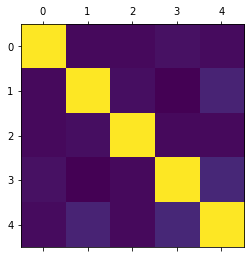

In [12]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

In [13]:
#Create a correlation heatmap using seaborn:
df.columns

Index(['Unnamed: 0', 'Region', 'Country', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [14]:
# Create a subset excluding the "City" and "Day" columns

sub = df[['Country', 'Region', 'Month' , 'Year', 'AvgTemperature']]

In [15]:
sub

,Country,Region,Month,Year,AvgTemperature
0,Algeria,Africa,1,1995,64.2
1,Algeria,Africa,1,1995,49.4
2,Algeria,Africa,1,1995,48.8
3,Algeria,Africa,1,1995,46.4
4,Algeria,Africa,1,1995,47.9
...,...,...,...,...,...
2906322,US,North America,7,2013,82.4
2906323,US,North America,7,2013,81.6
2906324,US,North America,7,2013,84.2
2906325,US,North America,7,2013,83.8


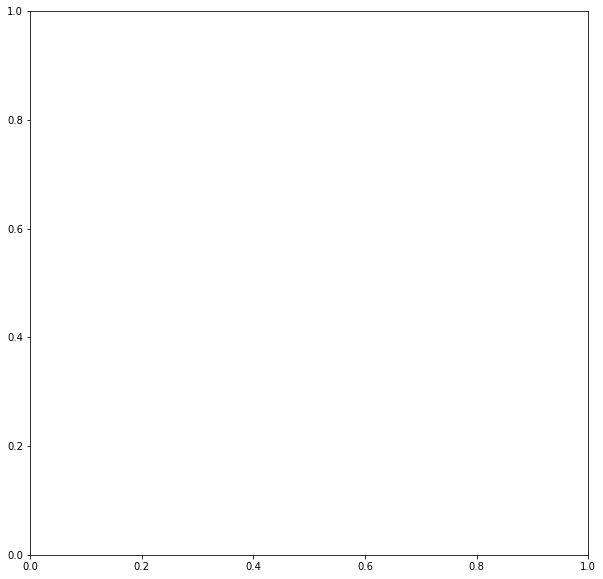

In [16]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

In [49]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

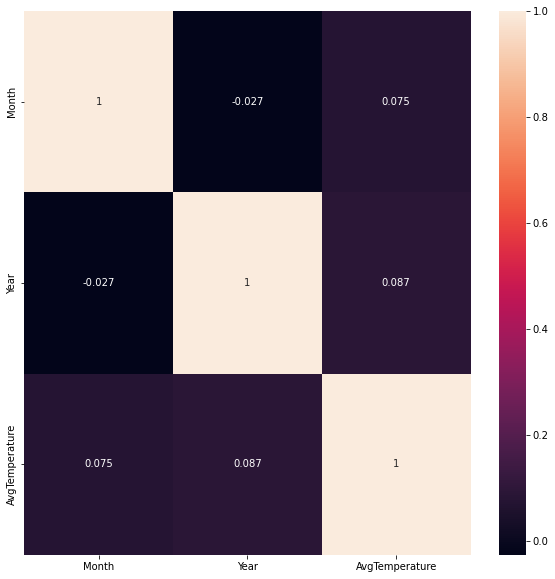

In [50]:
corr.figure

Meaning of the coefficients:
0 indicates no relationship between variables
0.1–0.2 indicates weak relationship
0.4–0.8 indicates moderate relationship
0.8–1.0 indicated strong relationship

### Scatterplots:

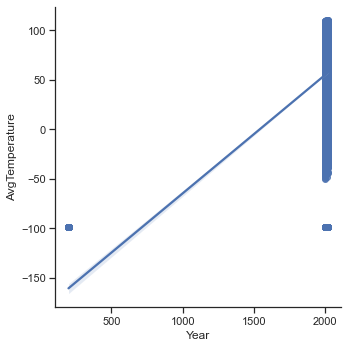

In [65]:
sns.lmplot(x = 'Year' , y = 'AvgTemperature', data = df)

The scatterplot indicates that there is a strong positive relationship. This can be easily seen as the line is upward and increases as it goes from the left to the right.
It scatterplot also makes it easier to spot the outliers, as for example point at Year = 2000 and AvgTemperature at -100

### Pair Plots:

In [53]:
sub_2 = sub[['Month' , 'Year', 'AvgTemperature']]

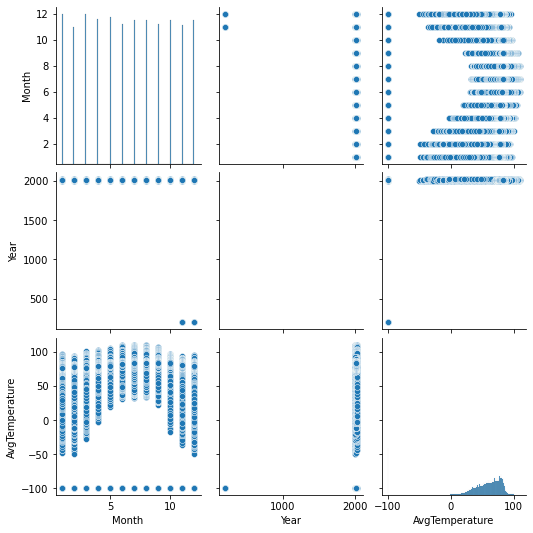

In [54]:
g = sns.pairplot(sub_2)

The pair plot can be interpreted as the scatterplot. It also shows that there is a moderate correlation between Avg Temperature and Year.

### Categorical Plots:

/Users/a/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AvgTemperature', ylabel='Density'>

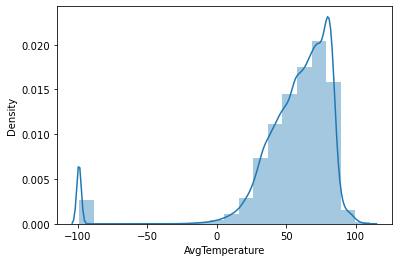

In [56]:
sns.distplot(df['AvgTemperature'], bins = 20)

In [57]:
df.loc[df['AvgTemperature'] < 0, 'Temperature category'] = 'Low temperature'

In [58]:
df.loc[(df['AvgTemperature'] >= 0) & (df['AvgTemperature'] < 50), 'Temperature category'] = 'Middle temperature'

In [74]:
df.loc[df['AvgTemperature'] >= 50, 'Temperature category'] = 'High temperature'

In [75]:
# Creating Year brackets
df.loc[(df['Year'] <= 1995) & (df['Year'] > 2000), 'Period'] = 'Between 1995 and 2000'
df.loc[(df['Year'] <= 2000) & (df['Year'] > 2010), 'Period'] = 'Between 2000 and 2010'
df.loc[(df['Year'] <= 2010) & (df['Year'] > 2020), 'Period'] = 'Between 2010 and 2020'

In [76]:
df['AvgTemperature'].value_counts(dropna = False)

-99.0    79672
 80.2     7442
 80.8     7362
 81.1     7247
 79.2     7241
         ...  
-45.6        1
-35.4        1
-39.4        1
-33.1        1
-36.7        1
Name: AvgTemperature, Length: 1517, dtype: int64

In [77]:
df.columns

Index(['Unnamed: 0', 'Region', 'Country', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature', 'Temperature category', 'Price category',
       'Year_category', 'Period'],
      dtype='object')

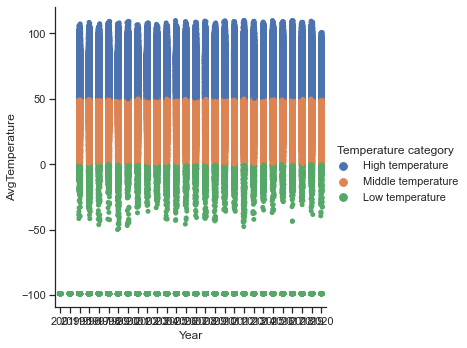

In [84]:
# Create a categorical plot in seaborn using the temperature categories created above

sns.set(style="ticks")
g = sns.catplot(x='Year', y='AvgTemperature',  hue="Temperature category", data=df)

### Hypothesis

When the variable 'years' increases, the average temperature increases